In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
import time
import warnings
warnings.filterwarnings('ignore')

# Fungsi untuk memuat dan memproses dataset

In [8]:
def load_and_process_data(file_path):
    # Memuat dataset
    df = pd.read_csv("/content/data.csv")

    # Memeriksa data
    print("Informasi Dataset:")
    print(f"Jumlah data: {len(df)}")
    print(df.head())
    print("\nInformasi Kolom:")
    print(df.info())
    print("\nStatistik Deskriptif:")
    print(df.describe())

    # Memeriksa nilai yang hilang
    print("\nNilai yang hilang:")
    print(df.isnull().sum())

    # Memeriksa distribusi label
    print("\nDistribusi Label:")
    print(df['label'].value_counts())

    return df

# Fungsi untuk mempersiapkan data

In [9]:
def prepare_data(df):
    # Memisahkan fitur dan target
    X = df['Text']
    y = df['label']

    # Mengubah teks menjadi fitur TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
    X_vectorized = vectorizer.fit_transform(X)

    # Membagi data menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(
        X_vectorized, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\nUkuran data latih: {X_train.shape}")
    print(f"Ukuran data uji: {X_test.shape}")

    return X_train, X_test, y_train, y_test, vectorizer

# Fungsi untuk melatih dan mengevaluasi model

In [10]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Inisialisasi models
    models = {
        'Multilayer Perceptron': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
        'Naive Bayes': MultinomialNB(),
        'Support Vector Machine': SVC(kernel='linear', probability=True, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
    }

    # Menyimpan hasil
    results = {
        'Algoritma': [],
        'Presisi': [],
        'Recall': [],
        'Skor F1': [],
        'Akurasi': [],
        'Waktu Pelatihan (detik)': []
    }

    # Confusion matrices
    cms = {}

    # Melatih dan mengevaluasi setiap model
    for name, model in models.items():
        print(f"\nMelatih model {name}...")
        start_time = time.time()

        # Melatih model
        model.fit(X_train, y_train)

        # Menghitung waktu pelatihan
        training_time = time.time() - start_time

        # Memprediksi
        y_pred = model.predict(X_test)

        # Menghitung metrik
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        cms[name] = cm

        # Menampilkan hasil
        print(f"Presisi: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Skor F1: {f1:.4f}")
        print(f"Akurasi: {accuracy:.4f}")
        print(f"Waktu Pelatihan: {training_time:.4f} detik")

        # Laporan klasifikasi
        print("\nLaporan Klasifikasi:")
        print(classification_report(y_test, y_pred))

        # Menyimpan hasil
        results['Algoritma'].append(name)
        results['Presisi'].append(f"{precision:.4f}")
        results['Recall'].append(f"{recall:.4f}")
        results['Skor F1'].append(f"{f1:.4f}")
        results['Akurasi'].append(f"{accuracy:.4f}")
        results['Waktu Pelatihan (detik)'].append(f"{training_time:.4f}")

    return results, cms

# Fungsi untuk visualisasi hasil

In [11]:
def visualize_results(results, cms):
    # Membuat DataFrame untuk hasil
    df_results = pd.DataFrame(results)

    # Menampilkan tabel hasil
    print("\nTabel Perbandingan Model:")
    print(df_results.to_string(index=False))

    # Simpan tabel hasil ke file CSV
    df_results.to_csv('hasil_perbandingan_model.csv', index=False)
    print("\nHasil perbandingan model telah disimpan ke 'hasil_perbandingan_model.csv'")

    # Visualisasi metrik performa model
    plt.figure(figsize=(12, 10))

    # Konversi metrik ke float untuk visualisasi
    metric_columns = ['Presisi', 'Recall', 'Skor F1', 'Akurasi']
    df_plot = df_results.copy()
    for col in metric_columns:
        df_plot[col] = df_plot[col].astype(float)

    # Plot batang untuk setiap metrik
    for i, metric in enumerate(metric_columns, 1):
        plt.subplot(2, 2, i)
        sns.barplot(x='Algoritma', y=metric, data=df_plot)
        plt.title(f'Perbandingan {metric}')
        plt.ylim(0, 1)
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('perbandingan_metrik.png')
    print("Visualisasi perbandingan metrik telah disimpan ke 'perbandingan_metrik.png'")

    # Visualisasi Confusion Matrix untuk setiap model
    plt.figure(figsize=(16, 12))
    for i, (name, cm) in enumerate(cms.items(), 1):
        plt.subplot(2, 2, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Prediksi Negatif', 'Prediksi Positif'],
                    yticklabels=['Aktual Negatif', 'Aktual Positif'])
        plt.title(f'Confusion Matrix - {name}')

    plt.tight_layout()
    plt.savefig('confusion_matrices.png')
    print("Visualisasi confusion matrices telah disimpan ke 'confusion_matrices.png'")

# Fungsi utama

Informasi Dataset:
Jumlah data: 16832
                                                Text   tagging  label
0  Kejaksaan Agung menetapkan mantan Menteri Perd...  non-hoax      1
1  Israel bawa jasad Yahya Sinwar ke Tel Aviv unt...  non-hoax      1
2  Pengelolaan jalan tol di Ibu Kota Nusantara IK...  non-hoax      1
3  KOMPAScom Artis Meghan Markle yang merupakan i...  non-hoax      1
4  Mahkamah Konstitusi MK memutuskan mengubah amb...  non-hoax      1

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16832 entries, 0 to 16831
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16832 non-null  object
 1   tagging  16832 non-null  object
 2   label    16832 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 394.6+ KB
None

Statistik Deskriptif:
              label
count  16832.000000
mean       0.615910
std        0.486394
min        0.000000
25%        0.000000
50%        1.000000
75%        

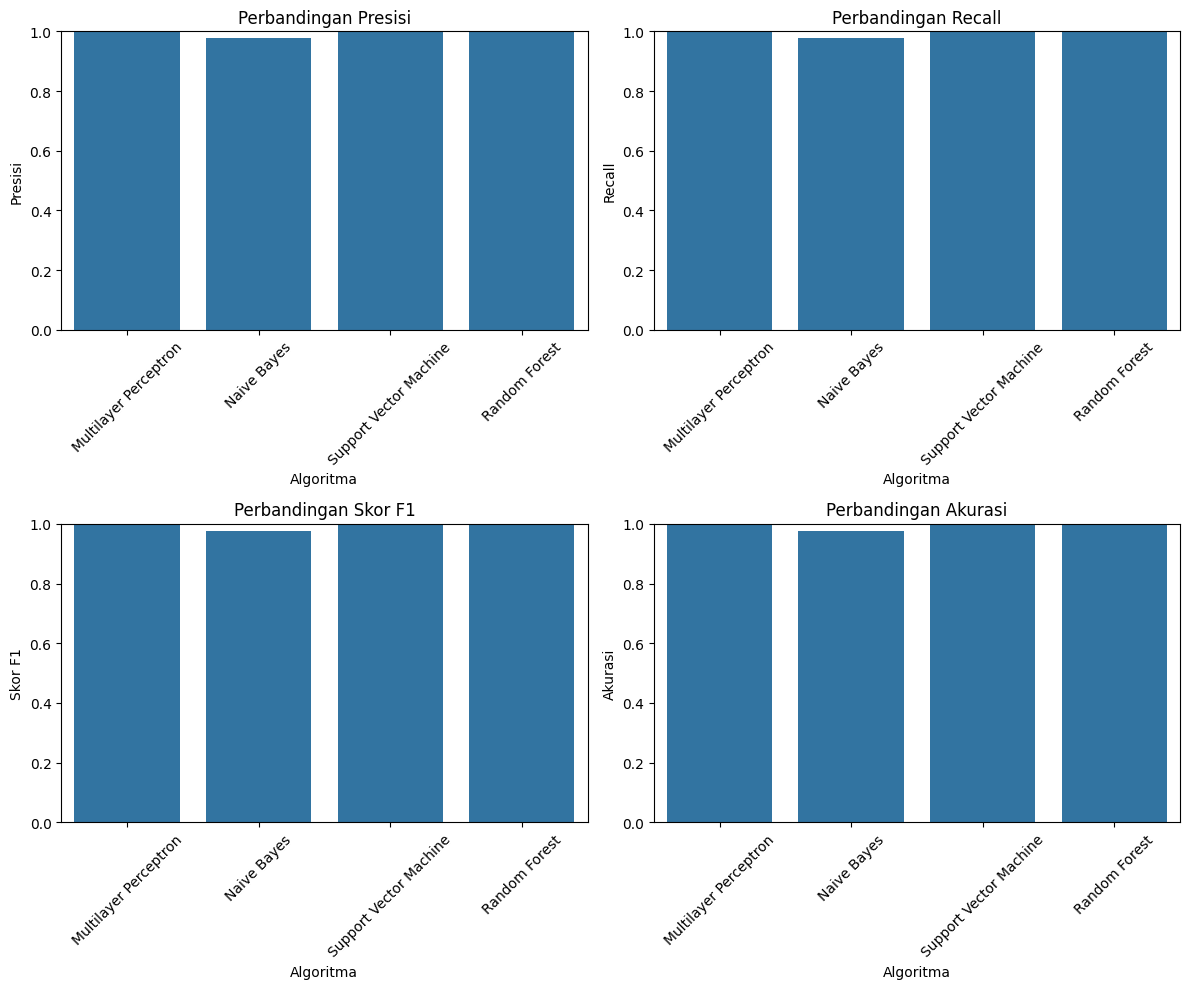

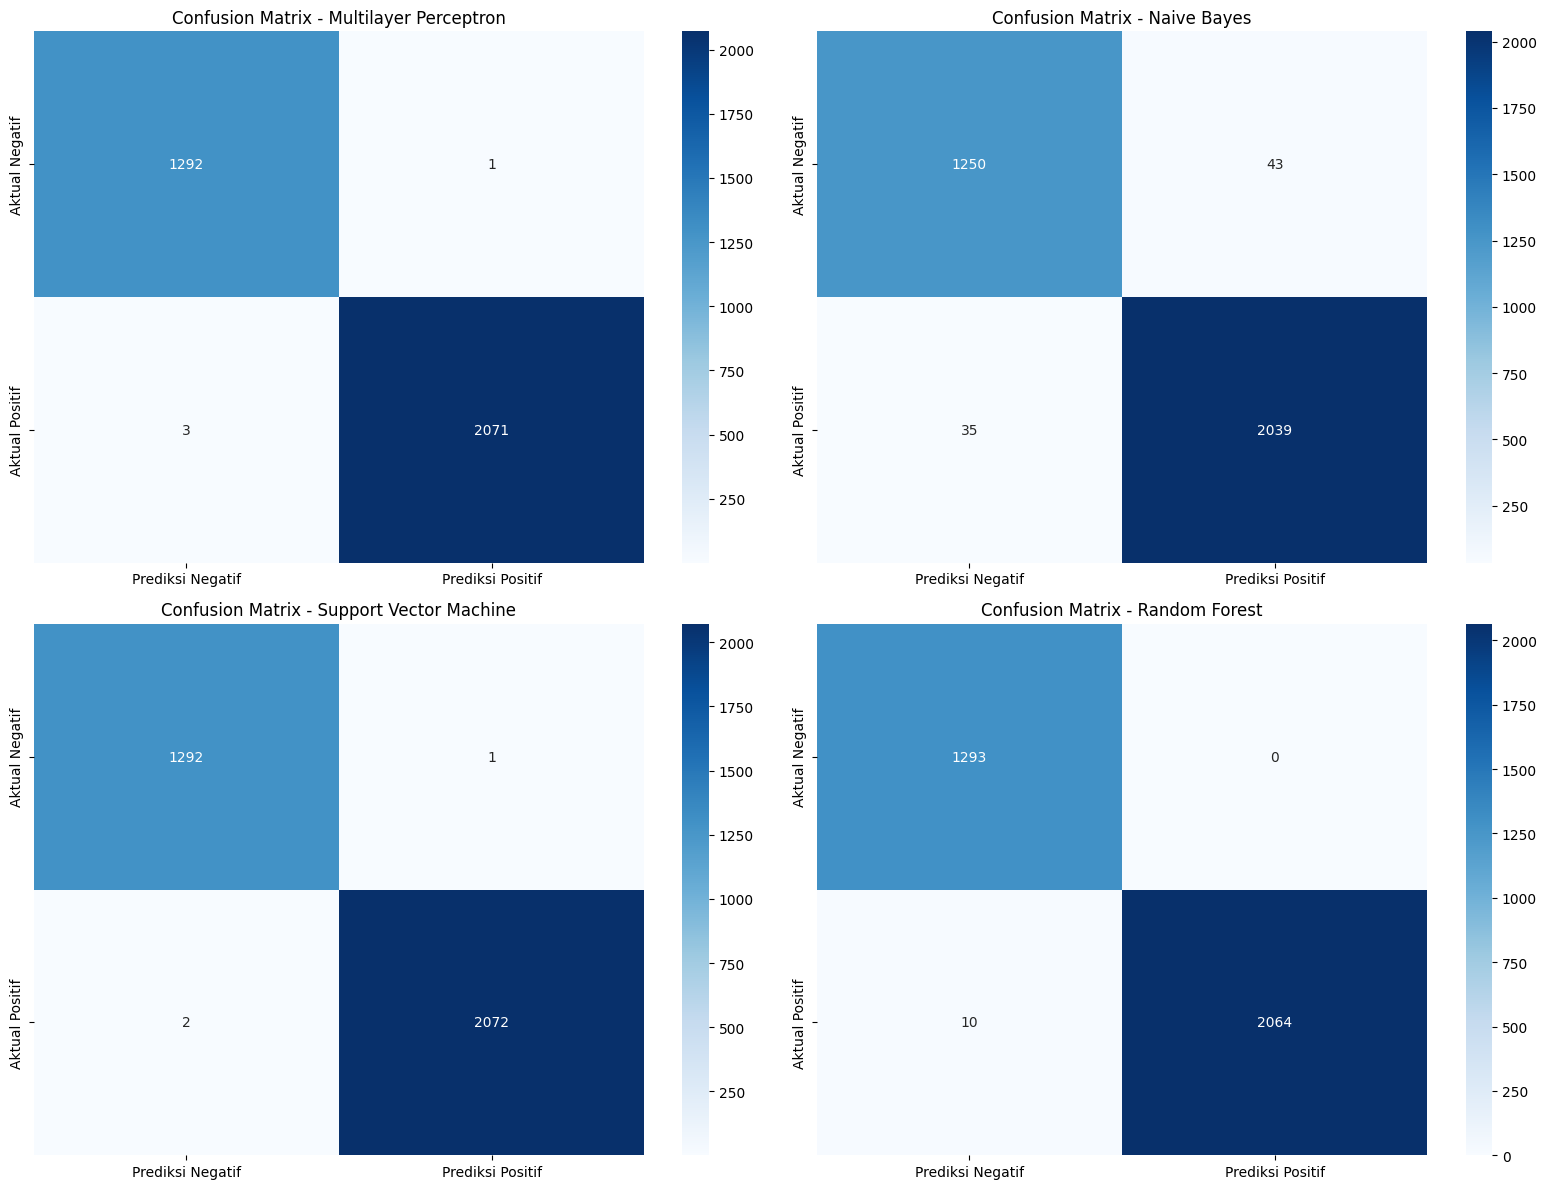

In [12]:
def main():
    # Memuat dan memproses data
    file_path = '/content/data.csv'
    try:
        df = load_and_process_data(file_path)

        # Mempersiapkan data
        X_train, X_test, y_train, y_test, vectorizer = prepare_data(df)

        # Melatih dan mengevaluasi model
        results, cms = train_and_evaluate_models(X_train, X_test, y_train, y_test)

        # Visualisasi hasil
        visualize_results(results, cms)

    except FileNotFoundError:
        print(f"Error: File '{file_path}' tidak ditemukan.")
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()